## Impact of Alternative Data on Bitcoin Price

Our project seeks to validate the correlations between Google search trends and Twitter sentiments with Bitcoin prices using recent data from 2017 and 2018. We are also interested to discover if these alternative data are predictive causes and whether they would be able to eﬀective forecast the value of Bitcoin. This research also seeks to expand beyond social media and web traﬃc data to include transaction data such as the daily usage of Bitcoin addresses.
In brief, our research takes a quantitative approach to:
1. Explore relationships between alternative data/factors (Google Trends interest levels, Twitter sentiments, Bitcoin exchange page views and BTC addresses used per day) and Bitcoin prices/returns.
2. Discover if these factors precede a rise or fall in the value of Bitcoin.
3. Transform our ﬁndings into a potential predictor of Bitcoin’s price



### Table of Contents
1. Python Libray<br/>
2. Data Collection<br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Google Trends <br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Bitcoin API <br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Twitter Tweets<br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.4 Pageviews - Coinbase Exchange<br/>
3. Data Model Validation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.1 Twitter Sentimental Sentimental Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Time Series <br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Regression<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Granger<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.5 Pearson Correlation<br/>
4. Multi-Factor Regression<br/>
4. Conclusion<br/>

### 1. Python Library

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from scipy.stats import pearsonr, zscore, f
import seaborn as sns
from pytrends.request import TrendReq
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import quandl
import json

/Users/song/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


###  2. Data Collection

3.1 Bitcoin Market Data
Similar to traditional stock exchanges, bitcoins are traded on a bitcoin exchange in multiple ﬁat currencies or alternative cryptocurrencies. We have chosen to use exchange rates on Bitﬁnex (Bitcoin versus USD) as it is one of the largest cryptocurrency exchanges in the world. The data was obtained from the database Quandl for ease of collection and returns transformation using their API. Bitcoin prices are transformed into log returns and tested for stationarity using the Dickey-Fuller test to accommodate the required statistical properties for more accurate test results (e.g. Granger-Causality Analysis).

3.2 Google Search Interests
One source of alternative data would be in the form of web searches. Google is the most-used search engine on the World Wide Web and handles 3 billion searches each day. A free service called Google Trends displays how often a particular search-term is searched for relative to the total number of searches for their search engine. Our group selected the keyword “Bitcoin” and retrieved the weekly search interest data from the Google Trends API.

3.3 Twitter Sentiment Data
Twitter is a social media network which has grown rapidly as an important tool for businesses and individuals to share comments and information including ﬁnancial news and investment decisions. Prior research by Bollen, Mao and Zeng (2011) has shown that the emotional content of tweets can be useful in predicting market movements. As a rich source of real-time alternative data, sentiment of the information diﬀused through Twitter can be useful in determining the overall market perspective towards cryptocurrency and bitcoin.

3.3.1 Twitter historical data
For the collection of historical tweets within our speciﬁed timeframe, our team utilised a python library called “TwitterScraper” to retrieve a sample size of approximately 10,000 tweets a month based on the selected keywords “bitcoin” and “BTC”. We were able to extract a total of 152,293 tweets which were then ﬁltered by popular Bitcoin inﬂuencers to reduce the noise for a total of 38,936 tweets and resampled into weekly data for sentiment analysis.

3.3.2 Sentiment Analysis Tool – VADER
Valence Aware Dictionary and sEntiment Reasoner (VADER) is a lexicon and rule-based sentiment analysis tool suited towards analysing and quantifying social media text sentiments. The algorithm detects the polarity and intensity of sentiments in texts and generates a normalized sentiment score between -1 (most negative) and +1 (most positive). By putting the weekly resampled Twitter historical data through the sentiment analysis tool, we were able to derive the overall weekly Twitter sentiment based on the sample data retrieved.

3.4 Pageviews
Web traﬃc and pageviews can also be another source of alternative data. Pageviews record the total number of times a webpage is visited within a selected time period. Estimations of pageviews for Coinbase.com, a highly reputable bitcoin exchange, during the investigation period were downloaded using Alexa which is an analysis software developed by Amazon.com. The number of pageviews would be an indicator of the general trend of investors’ interests in bitcoin prices during the period.

3.5 Bitcoin Unique Address Used
To receive bitcoin payments, users are required to create Bitcoin addresses to direct payments from their counterparties. The number of bitcoin unique addresses used for each period can then be utilised as a measure of individual transaction data for that period. This information is provided by Blockchain.info which deals in Bitcoin statistics and market information, and retrieved using Quandl’s API.

###  2.1 Google Trends

```python
# Step 1
# Open Google Trends
# Download the data into excel CSV file
# Key word = 'Bitcoin'

# Github Openscoure API Not updated; numbers are incorrect

```

In [2]:
df_google = pd.read_csv('Google.csv', skiprows=2)
df_google.head()


,Week,Bitcoin: (Worldwide)
0,1/1/2017,20
1,8/1/2017,21
2,15/1/2017,18
3,22/1/2017,18
4,29/1/2017,18


###  2.2 Bitcoin API

```python
# Commenting because of API limit; causing error once exceed limit
"""
# Bitcoin Number of Transactions Excluding Popular Addresses
# Data showing the total number of unique bitcoin 
#transactions per day excluding those which involve any of the top 100 most popular addresses popular addresses.

# pull data from quandl package with date range & weekly
# Bitcoin price, volume
btc = quandl.get("BITFINEX/BTCUSD", start_date="2017-01-01", end_date="2018-03-31", collapse="weekly")  

# Save to Excel
Df_comb.to_csv('btc_price.csv')

# 1
# Bitcoin Number of Unique Bitcoin Addresses Used  #*****
# Desc: Number of unique bitcoin addresses used per day.
BTC_address = quandl.get("BCHAIN/NADDU", start_date="2017-01-01", end_date="2018-03-31", collapse="weekly")


Df_comb = pd.DataFrame({'BTC Price':btc['Last'] , 'BTC Add':BTC_address['Value']}, index = BTC_address.index)

# Save to Excel
Df_comb.to_csv('df_BitcoinFactors.csv')
"""
```

In [3]:
df_BitcoinFactors = pd.read_csv('df_BitcoinFactors.csv')
df_BitcoinFactors.head()

,Date,BTC Price,BTC Add
0,1/1/2017,966.61,449831
1,8/1/2017,908.10,503340
2,15/1/2017,815.85,446468
3,22/1/2017,924.02,484668
4,29/1/2017,919.43,461291


###  2.3 Twitter Tweets

##### List of influencial Twitter account on bitcoins: 
aantonop;
BitcoinNetworks;
BitcoinMagazine;
BTCTN;
BTCnewsBOT;
BTCNewsletter;
Coindesk;
Cointelegraph;
ForbesCrypto;
RedditBTC;
NeerajKA;
VitalikButerin;
SatoshiLite;
WhalePanda;
NickSzabo4;
gavinandresen;
brian_armstrong;
starkness;
twobitidiot;
lopp;
rogerkver;
Excellion;
ErikVoorhees;
TuurDemeester

```python
# Step 1
# Open Command Prompt
# Set the directory in command prompt 
# Step 2
"""
twitterscraper "Bitcoin OR BTC: #Twitter account# " " -l 10000 --lang english -p 15 -bd 2017-01-01 -ed 2018-04-01 -o bitcoin_tweets.json
"""
# Replace #Twitter account# with the influencial twitter accounts above
# Step 3
# Run the code below to save Tweets into excel file
"""
import json
import pandas as pd

data = pd.read_json('bitcoin_tweets.json')
data = data.drop(['html','url'], axis=1)

# Write Tweets to Excel
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()
"""
# Step 4
# Lastly rename excel accordingly to twitter account
```

### 2.4 Pageviews - Coinbase Exchange

```python
# Step 1
# Open Alexa trail account to get Webpage Activity
# Download the data into excel CSV file
# The Webpage Activity is given as:
#    Data =  Number of Coinbase Webpage visits/ Total number of whole whole website visits
```

In [4]:
df_pageviews = pd.read_csv('PageviewsCoinbase.csv', skiprows=6)
df_pageviews.head()
# Decided to use only coinbase data set 

,Date,Metric,bitfinex.com,binance.com,coinbase.com
0,4/22/2016,Pageviews %,0.000001,NaN,0.000012
1,4/23/2016,Pageviews %,0.000001,NaN,0.000010
2,4/24/2016,Pageviews %,0.000002,NaN,0.000015
3,4/25/2016,Pageviews %,0.000002,NaN,0.000009
4,4/26/2016,Pageviews %,0.000002,NaN,0.000018


### Function for Regression test | Granger Causality test | Pearson Correlation test 

In [5]:
def test(factor_series, result, df_combine):

    # combine into a dataframe for testing
    df_test = pd.DataFrame(index=df_combine.index)
    df_test[factor_series] = df_combine[factor_series]
    df_test['returns'] = df_combine['BTC Returns']
    df_test = df_test.astype(float)


#    print(df_test.head())
    

    # Regression test
    if result == "regression":
        
        print(factor_series)
        reg_results = sm.OLS(df_test['returns'].astype(float), \
                             sm.add_constant(df_test[factor_series].astype(float))).fit()
        print(reg_results.summary())
#        plt.rc('figure', figsize=(12, 8))
#        plt.text(0.01,0.01,str(reg_results.summary()),{'fontsize': 3}, fontproperties = 'monospace')
#        plt.axis('off')
#        plt.tight_layout()
#        plt.savefig( factor_series +'table.png')
#        plt.show()
        
    # Granger causality test
    elif result == "granger":
        
        print(factor_series)
        gc_results = grangercausalitytests( df_test, maxlag=4, addconst=True, verbose=True)
        optimal_lag = -1
        F_test = -1.0
        for key in gc_results.keys():
            _F_test_ = gc_results[key][0]['params_ftest'][0]
            if _F_test_ > F_test:
                F_test = _F_test_
                optimal_lag = key
        return optimal_lag, gc_results
        
    # Pearson correlation test
    elif result == "pearson":
        print(factor_series)
        pc_results = pearsonr(df_test['returns'].astype(float), df_test[factor_series].astype(float))
        print("Pearson's Correlation Coefficient, p-value: " + str(pc_results))
        return pc_results
    
    # For faster results  
    elif result == "all":
        print(factor_series)
        reg_results = sm.OLS(df_test['returns'].astype(float), \
                             sm.add_constant(df_test[factor_series].astype(float))).fit()
        print(reg_results.summary())
#        plt.rc('figure', figsize=(9, 5))
#        plt.text(0.01,0.01,str(reg_results.summary()),{'fontsize': 3}, fontproperties = 'monospace')
#        plt.axis('off')
#        plt.tight_layout()
#        plt.savefig( factor_series +'table.png')
#        plt.show()

        print(factor_series)
        gc_results = grangercausalitytests(df_test, maxlag=8, addconst=True, verbose=True)

        
        print(factor_series)
        pc_results = pearsonr(df_test['returns'].astype(float), df_test[factor_series].astype(float))
        print("Pearson's Correlation Coefficient, p-value: " + str(pc_results))

### 3. Data Model Validation

### 3.1 Twitter Sentimental Analysis 

In [6]:
#%% Do Twitter Sentimental Analysis - Vader
df_sa = pd.DataFrame(index=['Sentiment', 'Price'], columns=range(1, 16))
df_full = pd.DataFrame()

# Twitter Account Users
users = ['aantonop','BitcoinNetworks','BitcoinMagazine','BTCTN','BTCnewsBOT','BTCNewsletter','Coindesk','Cointelegraph',\
         'ForbesCrypto','RedditBTC','NeerajKA','VitalikButerin','SatoshiLite','WhalePanda','NickSzabo4','gavinandresen',\
         'brian_armstrong','starkness','twobitidiot','lopp','rogerkver','Excellion','ErikVoorhees','TuurDemeester']

# import excel twitter output spreadsheets
for i in users:
    xl_output = pd.read_excel(str(i) + '.xlsx')

    # drop columns which are not needed
    xl_output = xl_output.drop(columns=['fullname', 'id', 'likes', 'replies', 'retweets', 'user'])
    xl_output = xl_output.replace(0, np.nan)
    xl_output = xl_output.dropna(axis=0, how='any')
    xl_output['sentiment'] = np.nan

    # conduct Vader sentiment analysis on data
    analyzer = SentimentIntensityAnalyzer()
    for j in xl_output.index:
        sentence = xl_output.loc[j]['text']
        xl_output.at[j, 'sentiment'] = analyzer.polarity_scores(sentence)['compound']

    # store monthly sentiment scores
    df_sa.loc['Sentiment'][i] = xl_output['sentiment'].mean()

    # full daily data
    df_full = pd.concat([df_full, xl_output])
    
# adjust data
df_full = df_full.sort_values('timestamp')
df_full = df_full.set_index('timestamp')
df_full2 = df_full.resample('W', how='mean')
df_full2.index = df_full2.index.astype(str).str.slice(0, 10)

/Users/song/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [7]:
# pull data from quandl package with date range & weekly
df_btc = pd.read_csv('btc_price.csv')
df_btc.index = df_full2.index


# Create dataframe to consildate reseults
df_tweet = pd.DataFrame(columns = ['BTC Returns', 'sentiment'])
df_tweet['sentiment'] = df_full2['sentiment'].pct_change(1)
df_tweet['BTC Returns'] = df_btc['Last'].pct_change(1)

#df_tweet['sentiment'] = np.log(df_full2['sentiment']/df_full2['sentiment'].shift(1))
#df_tweet['BTC Returns'] = np.log(df_btc['Last']/df_btc['Last'].shift(1))

df_tweet.dropna(inplace = True)
df_tweet = df_tweet.astype(float)


for col in df_tweet.columns[1:]:
    test(col, 'all', df_tweet)        
        

sentiment
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6491
Date:                Tue, 01 May 2018   Prob (F-statistic):              0.423
Time:                        15:54:29   Log-Likelihood:                 26.743
No. Observations:                  65   AIC:                            -49.49
Df Residuals:                      63   BIC:                            -45.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0405      0.020      1.98

<font color=green> Twitter Sentimental Analysis note significant </font> 

### 3.2 Times Series 

In [8]:
#%% Import Significant Results        
        
# Sample Codes for Research Methods #
# Group 7

# Conslidated the data - BTC last price, Google Trends, PageViews, BTC Address 

# pull data from excel
df_comb = pd.read_excel('Project Data.xlsx')
df_comb = df_comb.set_index('Date')
# Scaling the data factor to prevent multicollinearity errors
#df_comb['BTC Add'] = df_comb['BTC Add'] / 10000
# Scaling the data factor to prevent multicollinearity errors
#df_comb['CoinBase'] = df_comb['CoinBase'] * 10000

# Using Change percent
df_comb = df_comb.pct_change(1)

df_comb.columns = ['BTC Returns', 'BTC Address','Google','PageViews']
df_comb = df_comb[['BTC Returns', 'Google','PageViews','BTC Address']] #rearragning order for heatmap

df_comb.dropna(inplace = True)
df_comb.head()

,BTC Returns,Google,PageViews,BTC Address
Date,,,,
2017-01-08,-0.060531,0.050000,0.158961,0.118954
2017-01-15,-0.101586,-0.142857,-0.293769,-0.112989
2017-01-22,0.132586,0.000000,-0.088235,0.085560
2017-01-29,-0.004967,0.000000,-0.005120,-0.048233
2017-02-05,0.121456,-0.055556,0.067422,0.084127


Time Series


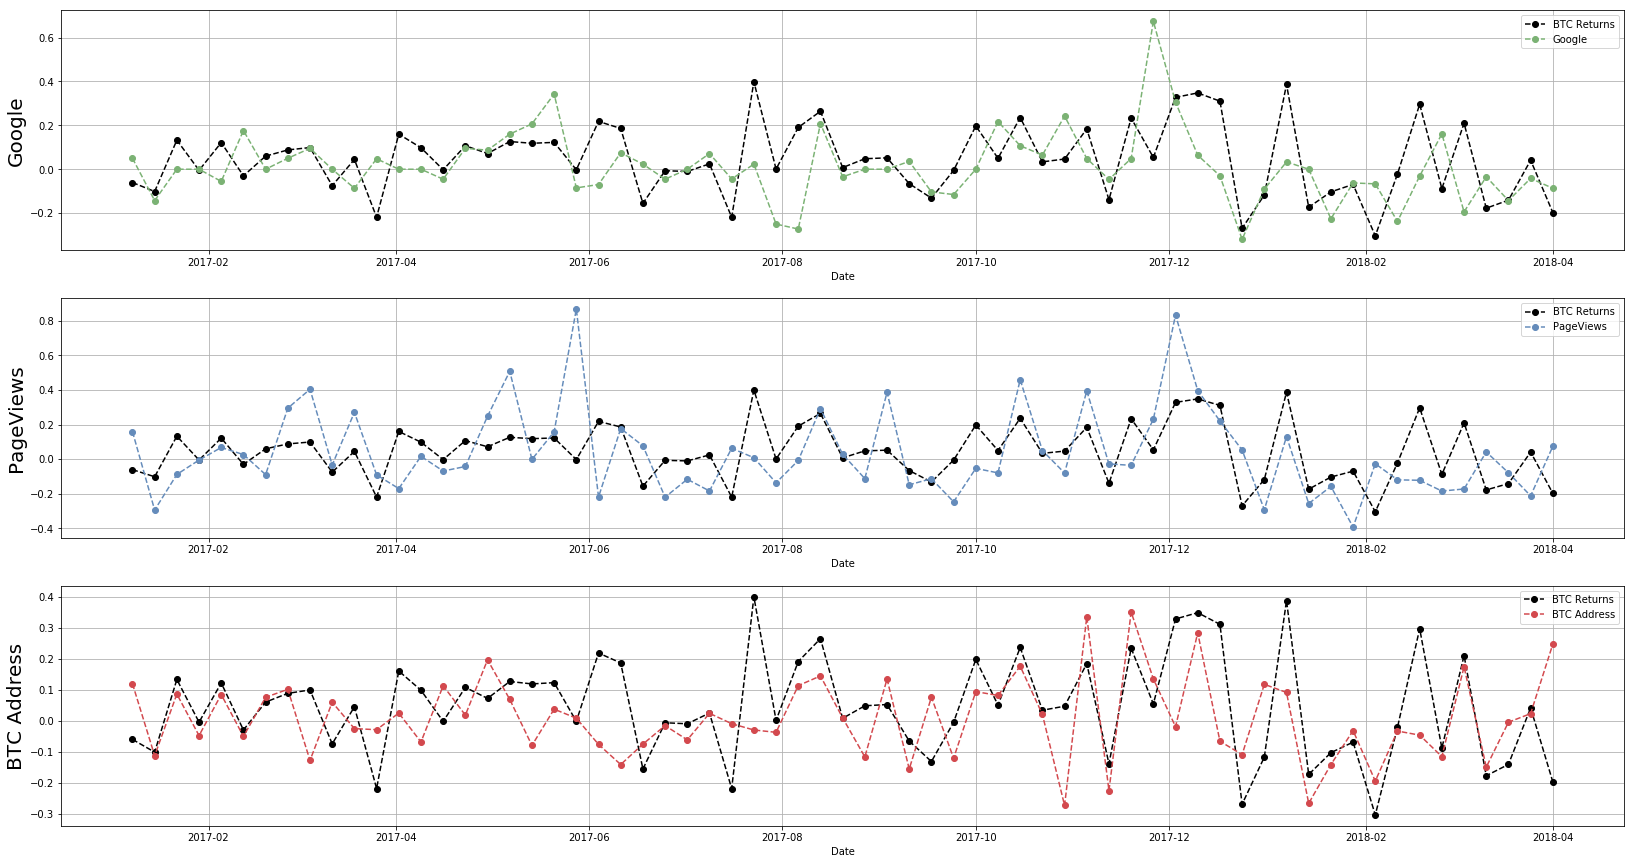

In [9]:
#%% plot Time-Series        

# Plot the Time Series
df_test = df_comb.copy()
# Normalising the Timeseries
# df_test = np.log(df_test / df_test.shift(1))
#for col in df_test.columns:
#    df_test[col] = zscore(df_test[col])
df_test = df_test.astype(float)
  
print("Time Series")
colours1 = ['black','xkcd:faded green', 'xkcd:faded blue', 'xkcd:faded red']

fig = plt.figure(figsize=(28,15))

for i, x in enumerate(df_test.columns[1:]):
    ax=plt.subplot(3,1,i+1)

    plt.plot(df_test.index, df_test['BTC Returns'],color= colours1[0], marker='o',\
             linestyle='dashed', label = 'BTC Returns' )
    
    plt.plot(df_test.index, df_test[x],color= colours1[i+1], marker='o', \
             linestyle='dashed', label = x )
    plt.grid(True)
    plt.legend()
    plt.ylabel(x, fontsize= 20)
    plt.xlabel('Date')

plt.savefig('TimeSeries.png')    
plt.show()    

### Dicky Fuller Test for Stationarity of Time Series

In [10]:
#%% Dicky Fuller 

# To test if time-series is stationary 
station = df_comb.copy()

df_dickey = pd.DataFrame(index = ['ADF Statistic','P-Value','Critical Values 1%','Critical Values 5%', \
                                  'Critical Values 10%'] ,columns =station.columns )

for col,i in enumerate(station.columns):
#    print('Dickey Fuller Test:', i)
    result = adfuller(station[i])
#    print('ADF Statistic: %f' % result[0])
    df_dickey.iloc[0, col] = result[0]
#    print('p-value: %f' % result[1])
    df_dickey.iloc[1, col] = result[1]
#    print('Critical Values:')
    idd = 0 
    for key, value in result[4].items():
#        print('\t%s: %.3f' % (key, value))
        df_dickey.iloc[2+idd, col] = value
        idd +=1

#df_dickey = df_dickey.astype('float') 
df_dickey

,BTC Returns,Google,PageViews,BTC Address
ADF Statistic,-8.27295,-5.79678,-6.70558,-10.2479
P-Value,4.73896e-13,4.73166e-07,3.7926e-09,4.56528e-18
Critical Values 1%,-3.53693,-3.53693,-3.53693,-3.53693
Critical Values 5%,-2.90789,-2.90789,-2.90789,-2.90789
Critical Values 10%,-2.59149,-2.59149,-2.59149,-2.59149


###  3.3 Regression 

In [11]:
#%%  Regression
# test each factor
for i in df_comb.columns[1:]:
    test(i, 'regression', df_comb)   

Google
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.861
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0184
Time:                        15:54:30   Log-Likelihood:                 29.300
No. Observations:                  65   AIC:                            -54.60
Df Residuals:                      63   BIC:                            -50.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.019      2.028  

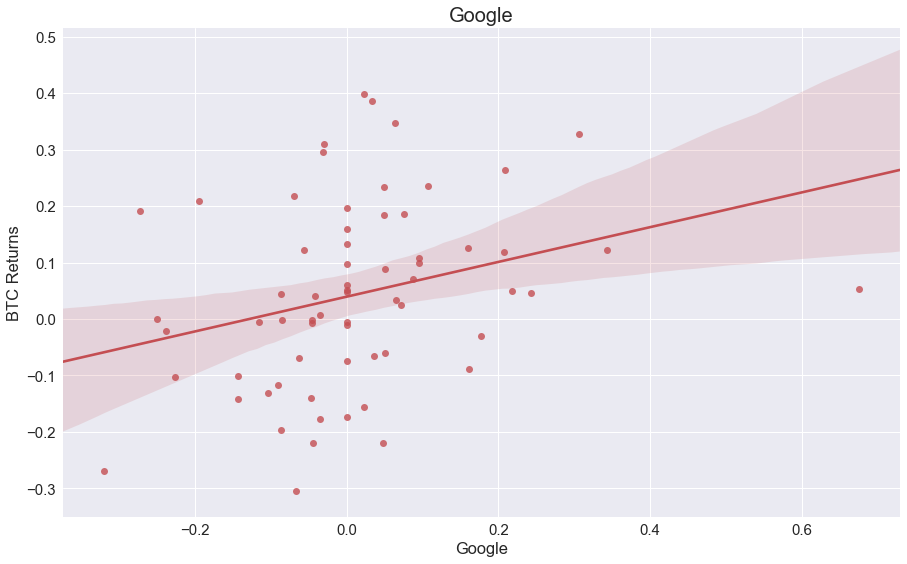

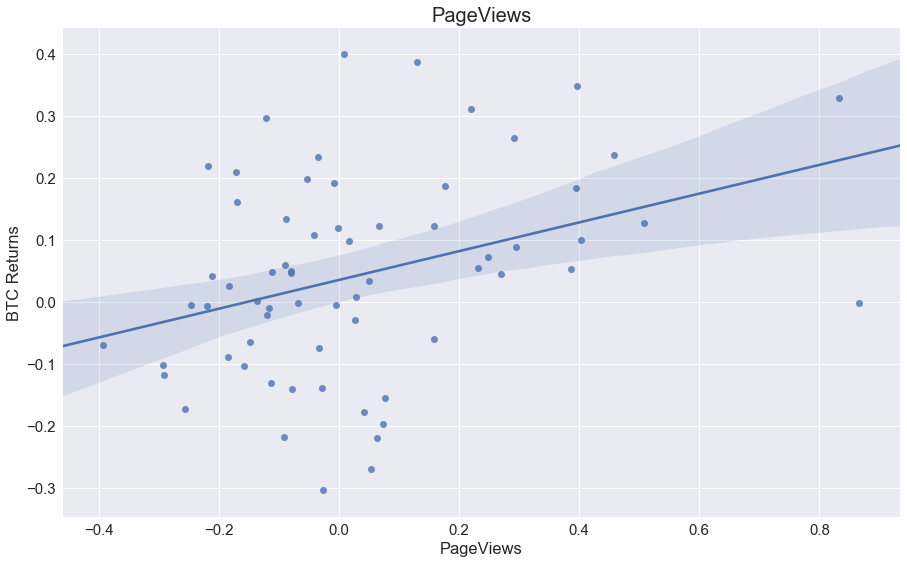

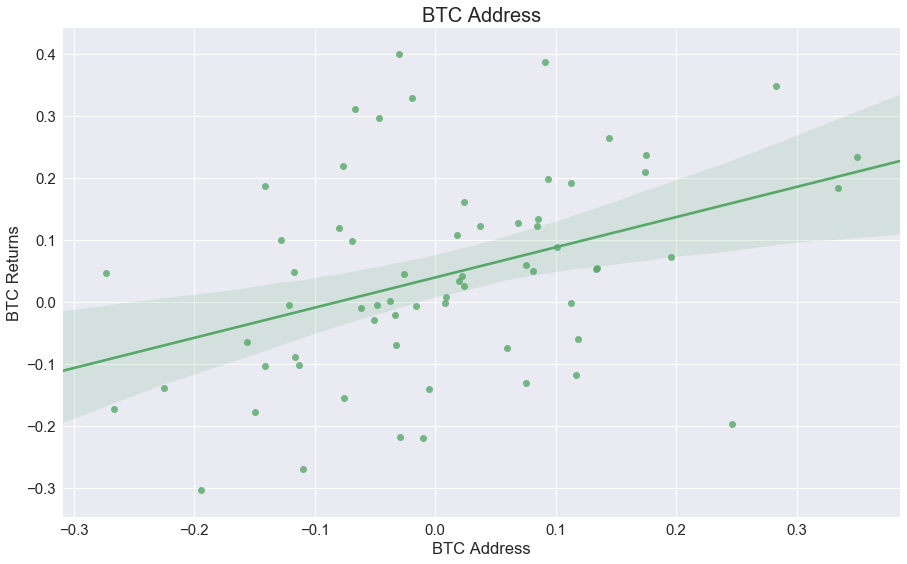

In [12]:
#%% Regression Graph 
colours = ['r','b','g', 'k' ]
sns.set(color_codes=True, font_scale=1.5)
for id,x in enumerate(df_comb.columns[1:]):
    
    plt.subplots(figsize=(15, 9))
    sns.regplot(df_comb[x],df_comb['BTC Returns'], color=colours[id])
    plt.title(x , fontsize= 20)
    plt.savefig(x+'.png')
    plt.show()       

###  3.4 Granger Causality Test

In [13]:
#%%  # Granger Causality Test

df_granger = pd.DataFrame(index = ['Optimal lag'],columns = df_comb.columns[1:])    

df_gstat = pd.DataFrame(columns = df_granger.columns)
df_gstat.loc['statistic', :] = [['F-critical', 'F-test', 'P-value']]
# test each factor
for id,i in enumerate(df_granger.columns):

    df_granger.loc['Optimal lag', i], gstat = test(df_comb.columns[id+1], 'granger', df_comb)   
    print(" ")
    print(" ")
    for key in gstat.keys():
            denom, num = gstat[key][0]['params_ftest'][2] , gstat[key][0]['params_ftest'][3]
            df_gstat.loc['lag='+str(key), i ] = np.array([f.pdf(0.9, dfn=num, dfd=denom),\
                                                                 gstat[key][0]['params_ftest'][0],\
                                                                 gstat[key][0]['params_ftest'][1]],dtype = float)
            

Google

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9254  , p=0.0923  , df_denom=61, df_num=1
ssr based chi2 test:   chi2=3.0693  , p=0.0798  , df=1
likelihood ratio test: chi2=2.9979  , p=0.0834  , df=1
parameter F test:         F=2.9254  , p=0.0923  , df_denom=61, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0750  , p=0.0538  , df_denom=58, df_num=2
ssr based chi2 test:   chi2=6.6801  , p=0.0354  , df=2
likelihood ratio test: chi2=6.3491  , p=0.0418  , df=2
parameter F test:         F=3.0750  , p=0.0538  , df_denom=58, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5919  , p=0.0619  , df_denom=55, df_num=3
ssr based chi2 test:   chi2=8.7652  , p=0.0326  , df=3
likelihood ratio test: chi2=8.1984  , p=0.0421  , df=3
parameter F test:         F=2.5919  , p=0.0619  , df_denom=55, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8910  , p=0.1259 

### 3.5 Pearson Correlation

In [14]:
df_pearson = pd.DataFrame(columns = df_comb.columns)
for i in df_comb.columns[1:]:
    df_pearson.loc['Coeff' , i],df_pearson.loc['P-value' , i] = test(i, 'pearson', df_comb)    

df_pearson = df_pearson.iloc[:, 1:]
df_pearson = df_pearson.astype(float)

Google
Pearson's Correlation Coefficient, p-value: (0.2917315908237461, 0.01837762483080449)
PageViews
Pearson's Correlation Coefficient, p-value: (0.3523767547264496, 0.003992094705700535)
BTC Address
Pearson's Correlation Coefficient, p-value: (0.3929031132201988, 0.0012058869395931901)


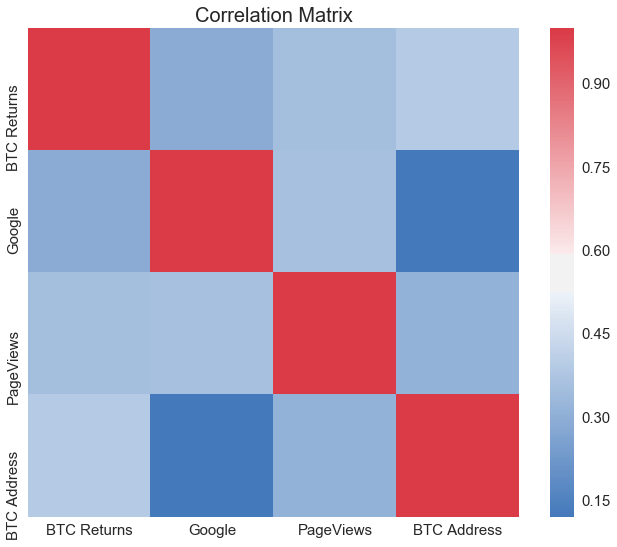

In [15]:
#%% Correlation table
corr = df_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap

cmap = sns.diverging_palette(1690, 10, sep=20, as_cmap=True)
# Plot
sns.heatmap(corr, cmap=cmap)
plt.title('Correlation Matrix', fontsize= 20)
plt.savefig('pearson.png')
plt.show() 

### 4 Mutil-Factor Regression

In [16]:
#%% Multi-Factor Regression

df_multi = df_comb.copy()
df_multi = df_multi.astype(float)

reg_results = sm.OLS(df_multi['BTC Returns'].astype(float), sm.add_constant(df_multi.iloc[:, 1:].astype(float))).fit()
print(reg_results.summary())    

                            OLS Regression Results                            
Dep. Variable:            BTC Returns   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.541
Date:                Tue, 01 May 2018   Prob (F-statistic):           0.000659
Time:                        15:54:32   Log-Likelihood:                 35.474
No. Observations:                  65   AIC:                            -62.95
Df Residuals:                      61   BIC:                            -54.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0333      0.018      1.834      

### Conclusion
In conclusion, our results showed that Google Trends interest levels, Coinbase pageviews and unique Bitcoin addresses used per day displayed positive correlation with Bitcoin returns. Unique Bitcoin addresses used per day showed the greatest R-squared value of 0.154 and the highest correlation with a coeﬃcient of 0.393. The economic intuition behind this is reasonable as investors are likely to make more transactions as Bitcoin prices increase. In any case, increases in daily Bitcoin addresses usage indicate an increase in transaction volume which could preclude short-term ﬂuctuations in Bitcoin prices.

We then went further to determine if these factors are “determinants” or Granger-causes of Bitcoin returns. Our results showed that Coinbase PageViews displayed greatest signiﬁcance with a lag of one week. Surprisingly, the results for Google Trends and unique Bitcoin address used per day were not signiﬁcant Granger-causes to Bitcoin returns after all. Coinbase PageViews is likely to be a Granger-cause to Bitcoin returns as investors will often access an exchange before carrying out bitcoin transactions.

Contrary to earlier papers which discovered positive correlations between tweet sentiments and Bitcoin prices, our ﬁndings showed that there were no signiﬁcant results to be found. After looking deeper into the extracted tweets data however, we discovered that a considerable amount of tweets were irrelevant to Bitcoin (e.g. advertisements, unrelated topics like football tagged with BTC hashtags, etc.). With the growing popularity of Bitcoin, many are keen on taking the opportunity to gain more social media attention by tagging their tweets with “]Bitcoin” or “]BTC”. That being said, our research also faces limitations in our chosen sentiment analysis tool (VADER) and the volume of tweets scraped. The sentiment analysis tool (VADER) faces diﬃculties in interpreting the sentiment of sarcastic tweets as well as pictorial references. Also, the accessibility changes to Twitter’s API has made it considerably more diﬃcult to access the actual population of historical tweets data.

To improve upon our research, we would use daily Bitcoin returns and data collected on a data basis (this information is currently not accessible for Google trends as Google limits the information to weekly data). This may provide a more precise perspective of Granger-causality when utilized for development of a predictive model. The one week lag time may not be realistic as investors often react in a matter of minutes or hours to news and price changes on ﬁnancial exchanges. For Twitter sentiment analysis, we would be keen on using a better sentiment analysis tool and a properly cleaned set of data for our research.